<a id = 'toc'></a>
# Table of Contents

- ### [Data](#data)
- ### [K-Means](#kmeans)
- ### [Gaussian Mixture Mode](#gmm_algorithm)
- ### [Agglomerative Clustering](#agglomerative_clustering)
- ### [DBSCAN](#dbscan)
- ### [Result](#result)

<a id = 'data'></a>
# Data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import cycle, islice, product
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 12, 8

In [2]:
np.random.seed(11)

n_samples = 1500

noisy_circles = datasets.make_circles(n_samples = n_samples, factor = .5, noise = .05)[0]
noisy_moons = datasets.make_moons(n_samples = n_samples, noise = .05)[0]
noisy_blobs = datasets.make_blobs(n_samples = n_samples, random_state = 11)[0]
noisy_random = np.random.rand(n_samples, 2)

X, y = datasets.make_blobs(n_samples = n_samples, random_state = 11)
change_matrix = [[0.6, -0.6], [-0.4, 0.8]]
noisy_ribbon = np.dot(X, change_matrix)

noisy_std = datasets.make_blobs(n_samples = n_samples, cluster_std = [1.0, 2.5, 0.5]
                            , random_state = 11)[0]

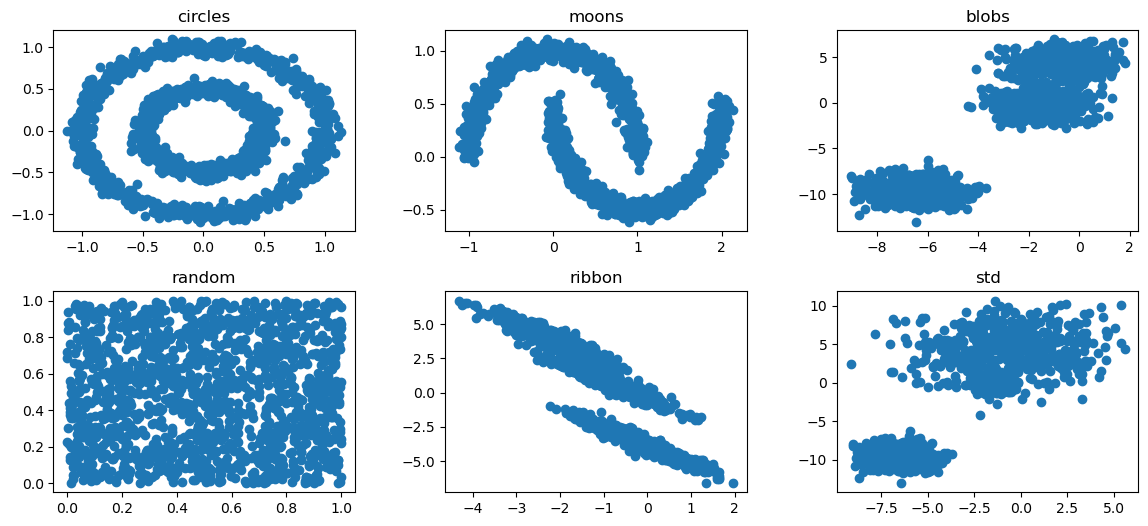

In [3]:
datasets_list = [noisy_circles, noisy_moons, noisy_blobs, noisy_random, noisy_ribbon, noisy_std]
datasets_names_list = ['circles', 'moons', 'blobs', 'random', 'ribbon', 'std']

fig, axes = plt.subplots(2, 3, figsize = (14, 6))
fig.subplots_adjust(hspace = .3, wspace = .3)

for idx, data in enumerate(datasets_list):
    if idx // 3 == 0:
        axes[0][idx].scatter(data[:, 0], data[:, 1])
        axes[0][idx].set_title(datasets_names_list[idx])
    else: #idx // 3 == 1:
        axes[1][idx-3].scatter(data[:, 0], data[:, 1])
        axes[1][idx-3].set_title(datasets_names_list[idx])
plt.show()

[UP](#toc)

<a id = 'kmeans'></a>
# K-Means

- [Inertia](#kmeans_inertia)
- [Silhouette Score](#kmeans_sil)
- [Model](#kmeans_model)

In [4]:
from sklearn.cluster import KMeans

<a id = 'kmeans_inertia'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Inertia
</h2>
</div>    
</left>

In [5]:
inertia_list = []
n_clusters = range(1, 11)
kmeans_params = list(product(n_clusters, datasets_list))

for param in kmeans_params:
    kmeans = KMeans(n_clusters = param[0], max_iter = 300, init = 'k-means++'
                   , tol = .0001, algorithm = 'elkan', random_state = 11)
    kmeans.fit(param[1])
    inertia_list.append(kmeans.inertia_)

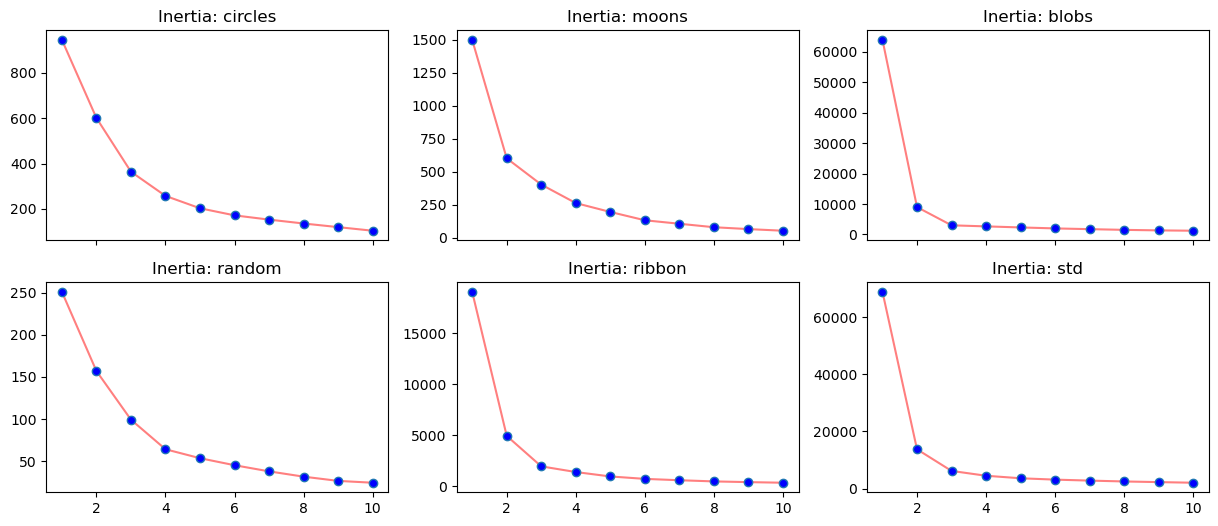

In [6]:
fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True)
for n_sample in range(0, len(datasets_list)):
    temp_list = [inertia_list[i] for i in range(n_sample, len(inertia_list), 6)]
    if n_sample // 3 == 0:
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, 'o', markerfacecolor = 'blue')
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, '-', alpha = .5, color = 'red', zorder = -1)
        axes[0][n_sample].set_title(f'Inertia: {datasets_names_list[n_sample]}')
    else:
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, 'o', markerfacecolor = 'blue')
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, '-', alpha = .5, color = 'red', zorder = -1)
        axes[1][n_sample - 3].set_title(f'Inertia: {datasets_names_list[n_sample]}')
plt.show()

<a id = 'kmeans_sil'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Silhouette Score
</h2>
</div>    
</left>

In [7]:
n_clusters = range(1, 11)
kmeans_params = list(product(n_clusters, datasets_list))
sil_score_list = []

for param in kmeans_params:
    kmeans = KMeans(n_clusters = param[0], max_iter = 300, init = 'k-means++'
                   , tol = .0001, algorithm = 'elkan', random_state = 11)
    kmeans.fit(param[1])
    y_pred = kmeans.labels_
    if len(np.unique(y_pred)) > 1 and len(np.unique(y_pred)) < 100:
        sil_score_list.append(silhouette_score(param[1], y_pred))
    else:
        sil_score_list.append(0.)

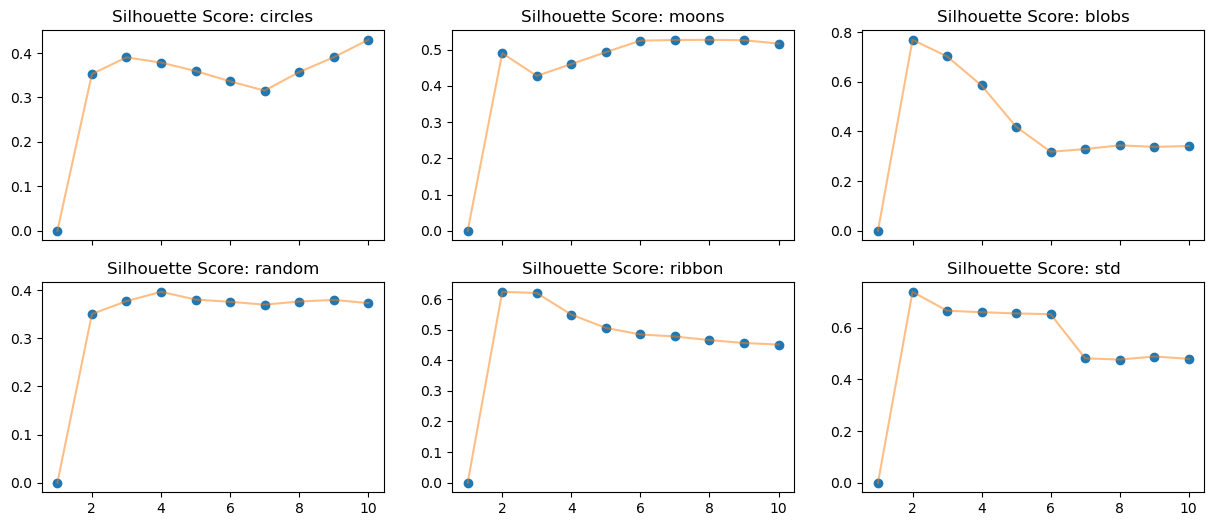

In [8]:
fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True)
for n_sample in range(0, len(datasets_list)):
    temp_list = [sil_score_list[i] for i in range(n_sample, len(sil_score_list), 6)]
    if n_sample // 3 == 0:
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, 'o')
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, '-', alpha = .5)
        axes[0][n_sample].set_title(f'Silhouette Score: {datasets_names_list[n_sample]}')
    else:
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, 'o')
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, '-', alpha = .5)
        axes[1][n_sample - 3].set_title(f'Silhouette Score: {datasets_names_list[n_sample]}')
plt.show()

<a id = 'kmeans_model'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Model
</h2>
</div>    
</left>

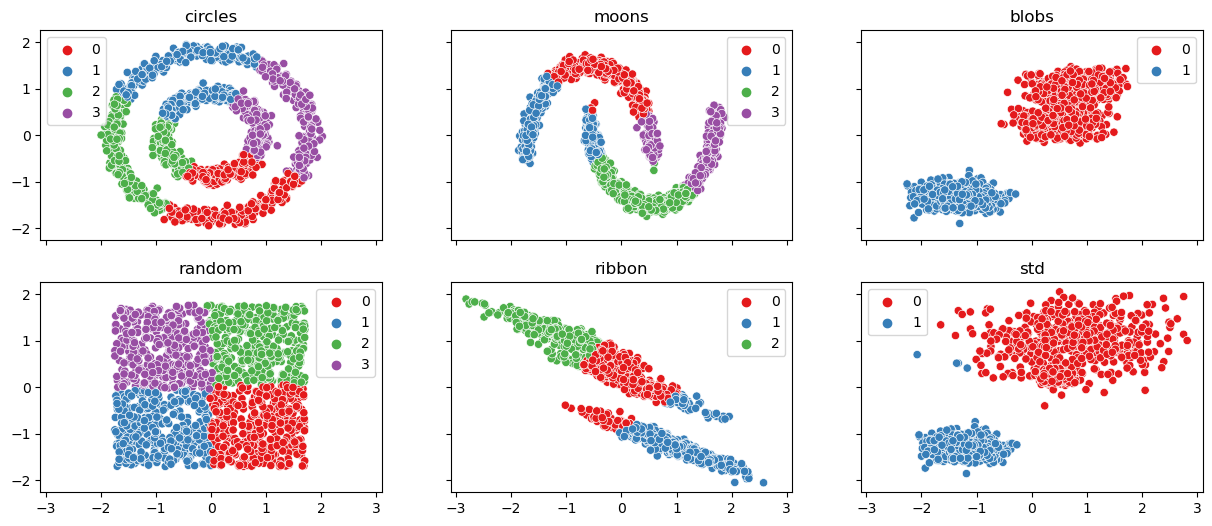

In [9]:
kmeans_silhouette_score = []

datasets_params_list = [
    (noisy_circles, {'n_clusters': 4}),
    (noisy_moons, {'n_clusters': 4}),
    (noisy_blobs, {'n_clusters': 2}),
    (noisy_random, {'n_clusters': 4}),
    (noisy_ribbon, {'n_clusters': 3}),
    (noisy_std, {'n_clusters': 2})]

fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True, sharey = True)

for i, (x_train, kmeans_params) in enumerate(datasets_params_list):
    x_train = StandardScaler().fit_transform(x_train)
    k_means = KMeans(n_clusters = kmeans_params['n_clusters'], tol = 0.001
                     , init = 'k-means++', algorithm = 'elkan', random_state = 11)
    k_means.fit(x_train)
    y_pred = np.hstack([x_train, k_means.labels_.reshape(-1, 1)])
    
    if len(np.unique(y_pred)) > 1 and len(np.unique(y_pred)) < 100:
        kmeans_silhouette_score.append(silhouette_score(param[1], y_pred))
    else:
        kmeans_silhouette_score.append(0.)
    
    if i // 3 == 0:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[0][i], palette = 'Set1')
        axes[0][i].set_title(datasets_names_list[i])
        
    else:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[1][i-3], palette = 'Set1')
        axes[1][i-3].set_title(datasets_names_list[i])

plt.show()

[UP](#toc)

<a id = 'gmm_algorithm'></a>
# Gaussian Mixture Mode

- [Silhouette Score](#gmm_sil)
- [Model](#gmm_model)

In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

<a id = 'gmm_sil'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Silhouette Score
</h2>
</div>    
</left>

In [11]:
n_components = range(1, 11)
gmm_params = list(product(n_clusters, datasets_list))
sil_score_list = []

for param in gmm_params:
    gmm = GaussianMixture(n_components = param[0], max_iter = 100, init_params = 'k-means++'
                   , tol = .0001, random_state = 11)
    gmm.fit(param[1])
    y_pred = gmm.predict(param[1])
    if len(np.unique(y_pred)) > 1:
        sil_score_list.append(silhouette_score(param[1], y_pred))
    else:
        sil_score_list.append(0.)

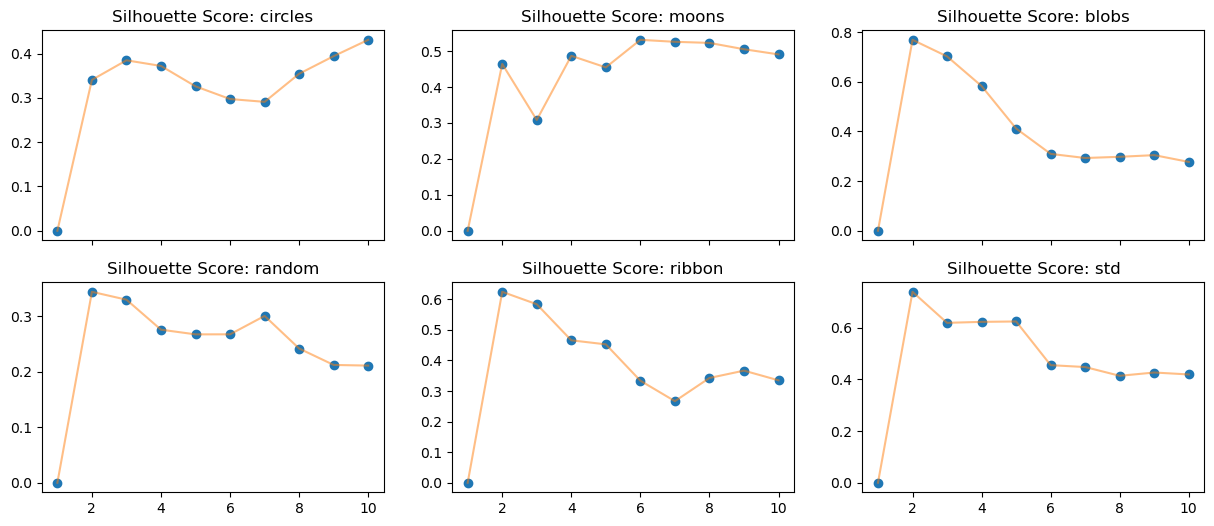

In [12]:
fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True)
for n_sample in range(0, len(datasets_list)):
    temp_list = [sil_score_list[i] for i in range(n_sample, len(sil_score_list), 6)]
    if n_sample // 3 == 0:
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, 'o')
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, '-', alpha = .5)
        axes[0][n_sample].set_title(f'Silhouette Score: {datasets_names_list[n_sample]}')
    else:
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, 'o')
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, '-', alpha = .5)
        axes[1][n_sample - 3].set_title(f'Silhouette Score: {datasets_names_list[n_sample]}')
plt.show()

<a id = 'gmm_model'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Model
</h2>
</div>    
</left>

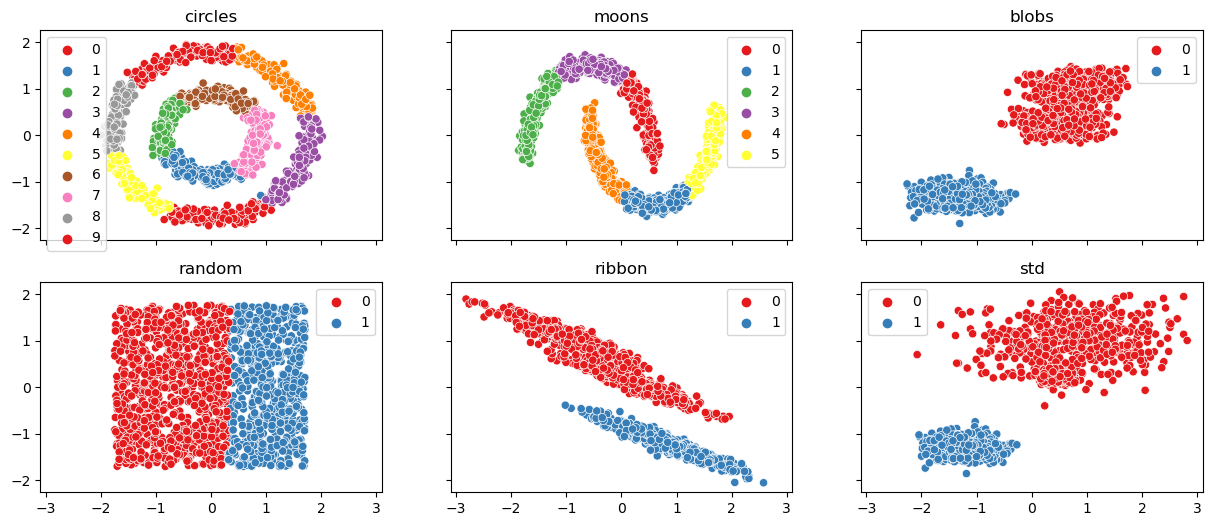

In [13]:
gmm_silhouette_score = []

datasets_params_list = [
    (noisy_circles, {'n_components': 10}),
    (noisy_moons, {'n_components': 6}),
    (noisy_blobs, {'n_components': 2}),
    (noisy_random, {'n_components': 2}),
    (noisy_ribbon, {'n_components': 2}),
    (noisy_std, {'n_components': 2})]

fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True, sharey = True)

for i, (x_train, gmm_params) in enumerate(datasets_params_list):
    x_train = StandardScaler().fit_transform(x_train)
    gmm = GaussianMixture(n_components = gmm_params['n_components'], max_iter = 100, init_params = 'k-means++'
                          , tol = .0001, random_state = 11)
    gmm.fit(x_train)
    predict = gmm.predict(x_train)
    y_pred = np.hstack([x_train, predict.reshape(-1, 1)])
    
    if len(np.unique(predict)) > 1 and len(np.unique(predict)) < 100:
        gmm_silhouette_score.append(silhouette_score(x_train, predict))
    else:
        gmm_silhouette_score.append(0.)
    
    if i // 3 == 0:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[0][i], palette = 'Set1')
        axes[0][i].set_title(datasets_names_list[i])
        
    else:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[1][i-3], palette = 'Set1')
        axes[1][i-3].set_title(datasets_names_list[i])

plt.show()

[UP](#toc)

<a id = 'agglomerative_clustering'></a>
# Agglomerative Clustering

- [Silhouette Score](#agg_sil)
- [Model](#agg_model)

In [14]:
from sklearn.cluster import AgglomerativeClustering

<a id = 'agg_sil'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Silhouette Score
</h2>
</div>    
</left>

In [15]:
n_clusters = range(1, 11)
agg_params = list(product(n_clusters, datasets_list))
sil_score_list = []

for param in agg_params:
    agg = AgglomerativeClustering(n_clusters = param[0], affinity='euclidean'
                                 , linkage='ward')
    agg.fit(param[1])
    y_pred = agg.labels_
    if len(np.unique(y_pred)) > 1:
        sil_score_list.append(silhouette_score(param[1], y_pred))
    else:
        sil_score_list.append(0.)

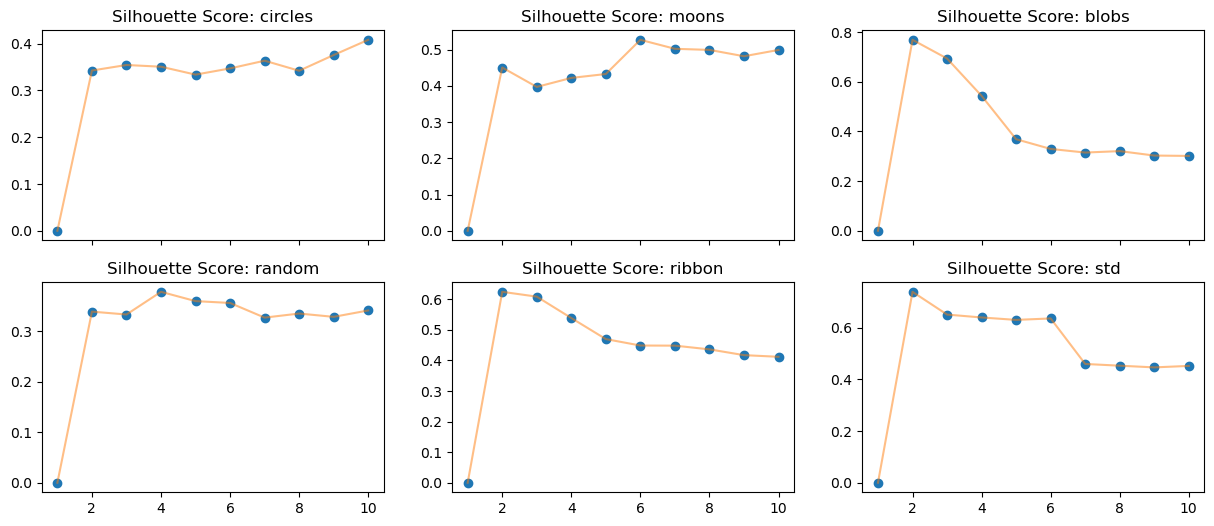

In [16]:
fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True)
for n_sample in range(0, len(datasets_list)):
    temp_list = [sil_score_list[i] for i in range(n_sample, len(sil_score_list), 6)]
    if n_sample // 3 == 0:
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, 'o')
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, '-', alpha = .5)
        axes[0][n_sample].set_title(f'Silhouette Score: {datasets_names_list[n_sample]}')
    else:
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, 'o')
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, '-', alpha = .5)
        axes[1][n_sample - 3].set_title(f'Silhouette Score: {datasets_names_list[n_sample]}')
plt.show()

<a id = 'agg_model'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Model
</h2>
</div>    
</left>

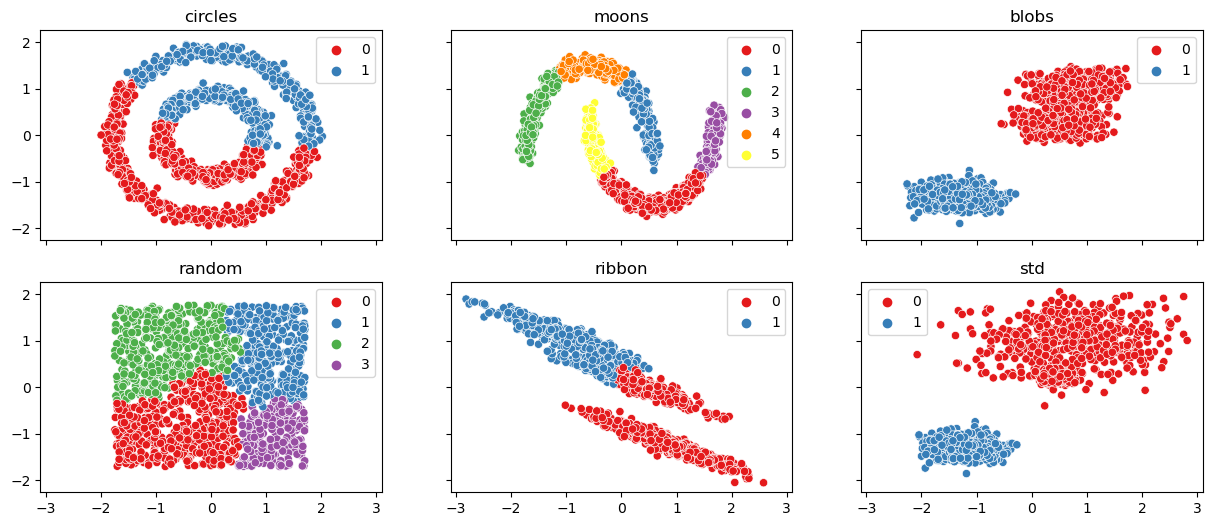

In [17]:
agg_silhouette_score = []

datasets_params_list = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 6}),
    (noisy_blobs, {'n_clusters': 2}),
    (noisy_random, {'n_clusters': 4}),
    (noisy_ribbon, {'n_clusters': 2}),
    (noisy_std, {'n_clusters': 2})]

fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True, sharey = True)

for i, (x_train, agg_params) in enumerate(datasets_params_list):
    x_train = StandardScaler().fit_transform(x_train)
    agg = AgglomerativeClustering(n_clusters = agg_params['n_clusters'], affinity='euclidean'
                                 , linkage='ward')
    agg.fit(x_train)
    predict = agg.labels_
    y_pred = np.hstack([x_train, (predict).reshape(-1, 1)])
    
    if len(np.unique(predict)) > 1 and len(np.unique(predict)) < 100:
        agg_silhouette_score.append(silhouette_score(x_train, predict))
    else:
        agg_silhouette_score.append(0.)
    
    if i // 3 == 0:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[0][i], palette = 'Set1')
        axes[0][i].set_title(datasets_names_list[i])
        
    else:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[1][i-3], palette = 'Set1')
        axes[1][i-3].set_title(datasets_names_list[i])

plt.show()

[UP](#toc)

<a id = 'dbscan'></a>
# DBSCAN

- [Silhouette Score](#dbscan_sil)
- [Model](#dbscan_model)

In [18]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from tqdm import tqdm
import pandas as pd

<a id = 'dbscan_sil'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Silhouette Score
</h2>
</div>    
</left>

In [19]:
for idx, data in enumerate(datasets_list):
    temp_dist = pdist(data)
    q1 = np.quantile(temp_dist, .25)
    q2 = np.quantile(temp_dist, .5)
    q3 = np.quantile(temp_dist, .75)
    IQR = q3 - q1
    left_bound = q1 - IQR*1.5
    right_bound = q3 + IQR*1.5
    print(f'[DATASET]: {datasets_names_list[idx]}, [LEFT]: {round(left_bound, 2)},\
[RIGHT]:, {round(right_bound, 2)}, [MEDIAN]: {round(q2, 2)}')

[DATASET]: circles, [LEFT]: -0.48,[RIGHT]:, 2.51, [MEDIAN]: 0.98
[DATASET]: moons, [LEFT]: -0.68,[RIGHT]:, 3.14, [MEDIAN]: 1.15
[DATASET]: blobs, [LEFT]: -12.36,[RIGHT]:, 26.78, [MEDIAN]: 6.04
[DATASET]: random, [LEFT]: -0.23,[RIGHT]:, 1.27, [MEDIAN]: 0.51
[DATASET]: ribbon, [LEFT]: -5.0,[RIGHT]:, 12.88, [MEDIAN]: 3.7
[DATASET]: std, [LEFT]: -10.46,[RIGHT]:, 24.7, [MEDIAN]: 7.62


In [20]:
circles_params = []
moons_params = []
blobs_params = []
random_params = []
ribbon_params = []
std_params = []

datasets_params = [circles_params, moons_params, blobs_params
                   , random_params, ribbon_params, std_params]

n_eps = np.round(np.arange(.1, .3, .02), 2)
min_samples = range(1, 11)

dbscan_params = list(product(n_eps, min_samples))
sil_score_list = []

for idx, data in enumerate(datasets_list):
    print(f'[DATASET]: {datasets_names_list[idx]}')
    for param in tqdm(dbscan_params):
        dbscan = DBSCAN(eps = param[0], min_samples = param[1])
        dbscan.fit(data)
        datasets_params[idx].append(len(np.unique(dbscan.labels_)))
        y_pred = dbscan.labels_
        if len(np.unique(y_pred)) > 1 and len(np.unique(y_pred)) < 100:
            datasets_params[idx].append(silhouette_score(data, y_pred))
        else:
            datasets_params[idx].append(0.)

[DATASET]: circles


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 34.92it/s]


[DATASET]: moons


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.55it/s]


[DATASET]: blobs


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 33.15it/s]


[DATASET]: random


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 64.66it/s]


[DATASET]: ribbon


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.07it/s]


[DATASET]: std


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.85it/s]


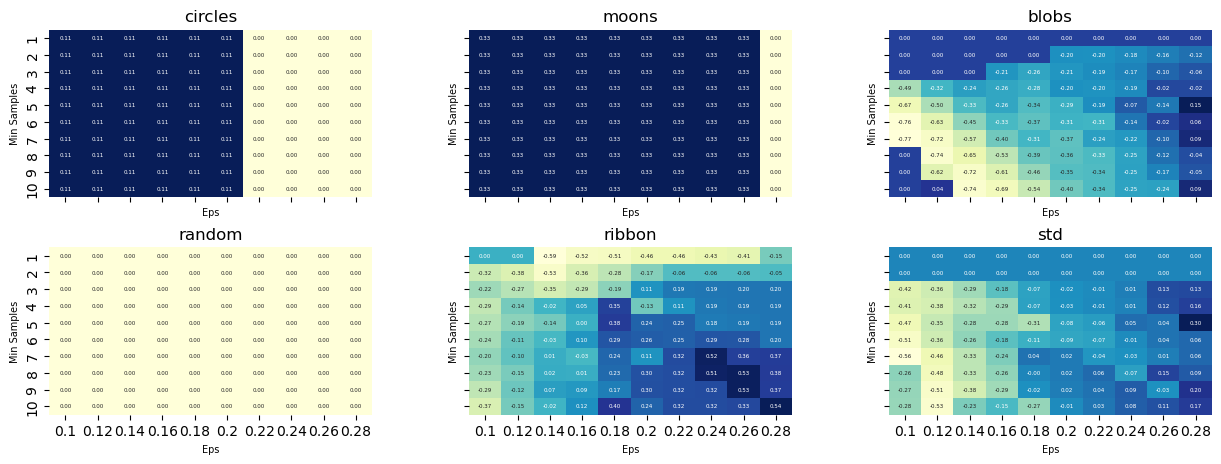

In [21]:
fig, axes = plt.subplots(2, 3, figsize = (15, 5), sharey = True, sharex = True)
fig.subplots_adjust(hspace = .3, wspace = .3)

for idx, dataset in enumerate(datasets_params):
    tmp = pd.DataFrame(dbscan_params, columns = ['eps', 'min_samples'])
    tmp['sil_score'] = dataset[1::2]
    tmp['number_of_clusters'] = dataset[::2]
    
    pivot_1 = pd.pivot_table(data = tmp, values = 'sil_score', index = 'min_samples', columns = 'eps')
    
    if idx // 3 == 0:
        sns.heatmap(data = pivot_1, annot = True, annot_kws = {'size':4}
                , fmt = '.2f', cmap = 'YlGnBu', cbar = False, ax = axes[0][idx])
        axes[0][idx].set_title(datasets_names_list[idx])
        axes[0][idx].set_xlabel('Eps', fontsize = 7)
        axes[0][idx].set_ylabel('Min Samples', fontsize = 7)
        
    else:
        sns.heatmap(data = pivot_1, annot = True, annot_kws = {'size':4}
                , fmt = '.2f', cmap = 'YlGnBu', cbar = False, ax = axes[1][idx-3])
        axes[1][idx-3].set_title(datasets_names_list[idx])
        axes[1][idx-3].set_xlabel('Eps', fontsize = 7)
        axes[1][idx-3].set_ylabel('Min Samples', fontsize = 7)
        
plt.show()

<a id = 'dbscan_model'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Model
</h2>
</div>    
</left>

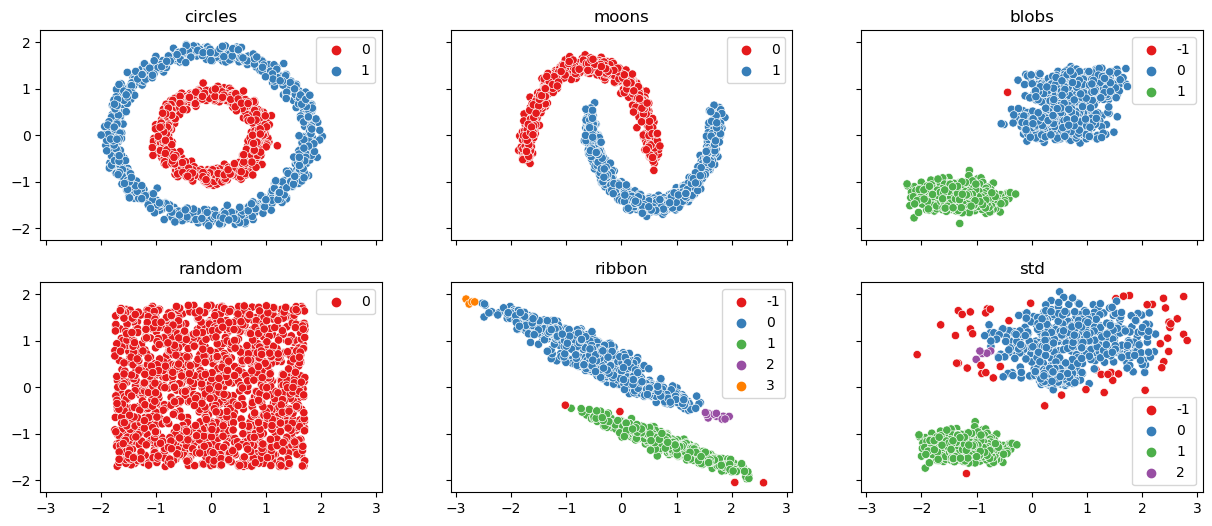

In [22]:
dbscan_silhouette_score = []

datasets_params_list = [
    (noisy_circles, {'eps': 0.3, 'min_samples': 2}),
    (noisy_moons, {'eps': 0.3, 'min_samples': 10}),
    (noisy_blobs, {'eps': 0.3, 'min_samples': 5}),
    (noisy_random, {'eps': 0.3, 'min_samples': 3}),
    (noisy_ribbon, {'eps': 0.184, 'min_samples': 5}),
    (noisy_std, {'eps': 0.18, 'min_samples': 5})]

fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True, sharey = True)

for i, (x_train, dbscan_params) in enumerate(datasets_params_list):
    x_train = StandardScaler().fit_transform(x_train)
    dbscan = DBSCAN(eps = dbscan_params['eps'], min_samples = dbscan_params['min_samples'])
    dbscan.fit(x_train)
    predict = dbscan.labels_
    y_pred = np.hstack([x_train, (predict).reshape(-1, 1)])
    
    if len(np.unique(predict)) > 1 and len(np.unique(predict)) < 100:
        dbscan_silhouette_score.append(silhouette_score(x_train, predict))
    else:
        dbscan_silhouette_score.append(0.)
        
    if i // 3 == 0:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[0][i], palette = 'Set1')
        axes[0][i].set_title(datasets_names_list[i])
        
    else:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[1][i-3], palette = 'Set1')
        axes[1][i-3].set_title(datasets_names_list[i])

plt.show()

[UP](#toc)

<a id = 'result'></a>
# Result

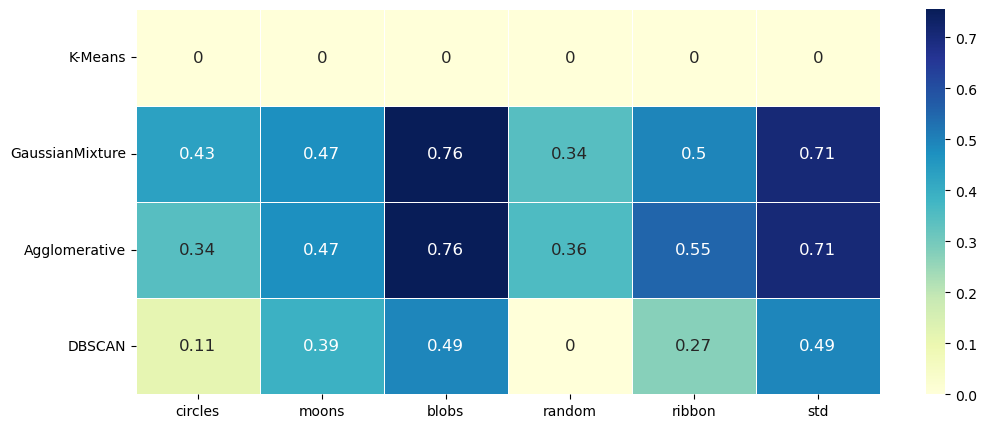

In [23]:
models_names = ['K-Means', 'GaussianMixture', 'Agglomerative', 'DBSCAN']

result_df = pd.DataFrame(np.c_[kmeans_silhouette_score, gmm_silhouette_score
                               , agg_silhouette_score, dbscan_silhouette_score]
                         , index = datasets_names_list, columns = models_names).T

fig, axes = plt.subplots(1, 1, figsize = (12, 5))
sns.heatmap(result_df, annot = True, annot_kws = {'size':12}, cmap = 'YlGnBu', cbar = True
            , ax = axes, linewidths = .5)#, linecolor = 'black')
plt.show()

[UP](#toc)